# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [233]:
print("Сиды - это начальные значения, которые используются алгоритмами генерации случайных чисел для инициализации генераторов псевдослучайных чисел. При фиксации сида, генераторы псевдослучайных чисел будут генерировать одну и ту же последовательность случайных чисел при каждом запуске программы.")

Сиды - это начальные значения, которые используются алгоритмами генерации случайных чисел для инициализации генераторов псевдослучайных чисел. При фиксации сида, генераторы псевдослучайных чисел будут генерировать одну и ту же последовательность случайных чисел при каждом запуске программы.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [234]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [235]:
random_rows = df_train.sample(n=10)

# Вывод результатов
print(random_rows)

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [236]:
# Отображение первых 5 объектов
first_5 = df_test.head(5)

# Отображение последних 5 объектов
last_5 = df_test.tail(5)

# Вывод результатов
print("Первые 5 объектов:")
print(first_5)
print("\nПоследние 5 объектов:")
print(last_5)

Первые 5 объектов:
                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm 

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [237]:
# Расчет основных статистик для числовых столбцов тренировочного датасета
numeric_stats_train = df_train.describe()

# Расчет основных статистик для категориальных столбцов тренировочного датасета
categorical_stats_train = df_train.describe(include='object')

# Расчет основных статистик для числовых столбцов тестового датасета
numeric_stats_test = df_test.describe()

# Расчет основных статистик для категориальных столбцов тестового датасета
categorical_stats_test = df_test.describe(include='object')

# Вывод результатов
print("Основные статистики для числовых столбцов тренировочного датасета:")
print(numeric_stats_train)
print("\nОсновные статистики для категориальных столбцов тренировочного датасета:")
print(categorical_stats_train)
print("\nОсновные статистики для числовых столбцов тестового датасета:")
print(numeric_stats_test)
print("\nОсновные статистики для категориальных столбцов тестового датасета:")
print(categorical_stats_test)

Основные статистики для числовых столбцов тренировочного датасета:
              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Основные статистики для категориальных столбцов тренировочного датасета:
                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [238]:
# Проверка наличия пропусков в датасете
missing_values = df_train.isnull().sum()

# Вывод результатов
print("Пропуски в датасете:")
print(missing_values)


# Информация о датасете, включая пропуски
df_info = df_train.info()

# Вывод результатов
print("\nИнформация о датасете:")
print(df_info)

# Основные статистики датасета, включая пропуски
df_stats = df_train.describe()

# Вывод результатов
print("\nОсновные статистики датасета:")
print(df_stats)
print("пропуски есть в колонках milieage, engine, max_power, torque, seats")

Пропуски в датасете:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque   

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [239]:
duplicates = df_train.duplicated(subset=df_train.columns.drop('selling_price'))

# Подсчет количества объектов с одинаковым признаковым описанием
num_duplicates = duplicates.sum()

# Отображение объектов с одинаковым признаковым описанием
duplicated_rows = df_train[duplicates]

# Вывод результатов
print("Количество объектов с одинаковым признаковым описанием в тренировочном датасете:", num_duplicates)

Количество объектов с одинаковым признаковым описанием в тренировочном датасете: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [240]:
print("\nОбъекты с одинаковым признаковым описанием:")
print(duplicated_rows)


Объекты с одинаковым признаковым описанием:
                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol 

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [241]:
# Удаление повторяющихся строк
df_unique = df_train.drop_duplicates(subset=df_train.columns.drop('selling_price'))

# Вывод результатов
print("Количество строк до удаления повторяющихся строк:", len(df_train))
print("Количество строк после удаления повторяющихся строк:", len(df_unique))
print("\nУникальные строки:")
print(df_unique)

Количество строк до удаления повторяющихся строк: 6999
Количество строк после удаления повторяющихся строк: 5840

Уникальные строки:
                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2

In [242]:
assert df_unique.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [243]:
df_unique = df_unique.reset_index(drop=True)

# Вывод результатов
print("Обновленный датасет с индексами строк от 0 без пропусков:")
print(df_unique)

Обновленный датасет с индексами строк от 0 без пропусков:
                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission    

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [244]:
# Удаление единиц измерения и преобразование столбцов к типу данных float
df_train_unique = df_unique

df_train_unique['mileage'] =df_unique['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

df_train_unique['engine']=df_unique['engine'].astype(str).str.replace(' CC','').astype(float)

df_train_unique['max_power']=df_train_unique['max_power'] = pd.to_numeric(df_train_unique['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')

mean_max_power = df_train_unique['max_power'].mean()

df_train_unique['max_power'] = df_train_unique['max_power'].fillna(mean_max_power)

df_test_unique = df_test

df_test_unique = df_test_unique.drop_duplicates(subset=df_train.columns.drop('selling_price'))

df_test_unique['mileage'] =df_test_unique['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

df_test_unique['engine']=df_test_unique['engine'].astype(str).str.replace(' CC','').astype(float)

df_test_unique['max_power']=df_test_unique['max_power'] = pd.to_numeric(df_test_unique['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')

mean_max_power = df_test_unique['max_power'].mean()

df_test_unique['max_power'] = df_test_unique['max_power'].fillna(mean_max_power)

# Вывод обновленного датасета
print(df_train_unique)
print(df_test_unique)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner  mileage  engine  \
0     Diesel  Indiv

/tmp/ipykernel_11795/1902707809.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unique['mileage'] =df_test_unique['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
/tmp/ipykernel_11795/1902707809.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unique['engine']=df_test_unique['engine'].astype(str).str.replace(' CC','').astype(float)
/tmp/ipykernel_11795/1902707809.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [245]:



mileage_median = df_train_unique['mileage'].median()
engine_median = df_train_unique['engine'].median()
max_power_median = df_train_unique['max_power'].median()
seats_median = df_train_unique['seats'].median()

df_train_unique['mileage'] = df_train_unique['mileage'].fillna(mileage_median)
df_train_unique['engine'] = df_train_unique['engine'].fillna(engine_median)
df_train_unique['max_power'] = df_train_unique['max_power'].fillna(max_power_median)
df_train_unique['seats'] = df_train_unique['seats'].fillna(seats_median)

df_test_unique['mileage'] = df_test_unique['mileage'].fillna(mileage_median)
df_test_unique['engine'] = df_test_unique['engine'].fillna(engine_median)
df_test_unique['max_power'] = df_test_unique['max_power'].fillna(max_power_median)
df_test_unique['seats'] = df_test_unique['seats'].fillna(seats_median)

print(mileage_median)

19.369999999999997


/tmp/ipykernel_11795/2934304937.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unique['mileage'] = df_test_unique['mileage'].fillna(mileage_median)
/tmp/ipykernel_11795/2934304937.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unique['engine'] = df_test_unique['engine'].fillna(engine_median)
/tmp/ipykernel_11795/2934304937.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [246]:
print("seats лучше сделать категориальной переменной так как количество сидений в машине не та переменная, над которой можно производить арифметические действия, если в машине будет много сидений на цену это будет влиять мало, количество сидений влияет на цену только в совокупности с какими-либо признаками.")

seats лучше сделать категориальной переменной так как количество сидений в машине не та переменная, над которой можно производить арифметические действия, если в машине будет много сидений на цену это будет влиять мало, количество сидений влияет на цену только в совокупности с какими-либо признаками.


In [247]:
df_train_unique['engine'] = df_train_unique['engine'].astype(int)
df_train_unique['seats'] = df_train_unique['seats'].astype(int)

df_test_unique['engine'] = df_test_unique['engine'].astype(int)
df_test_unique['seats'] = df_test_unique['seats'].astype(int)

/tmp/ipykernel_11795/461928012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unique['engine'] = df_test_unique['engine'].astype(int)
/tmp/ipykernel_11795/461928012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_unique['seats'] = df_test_unique['seats'].astype(int)


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

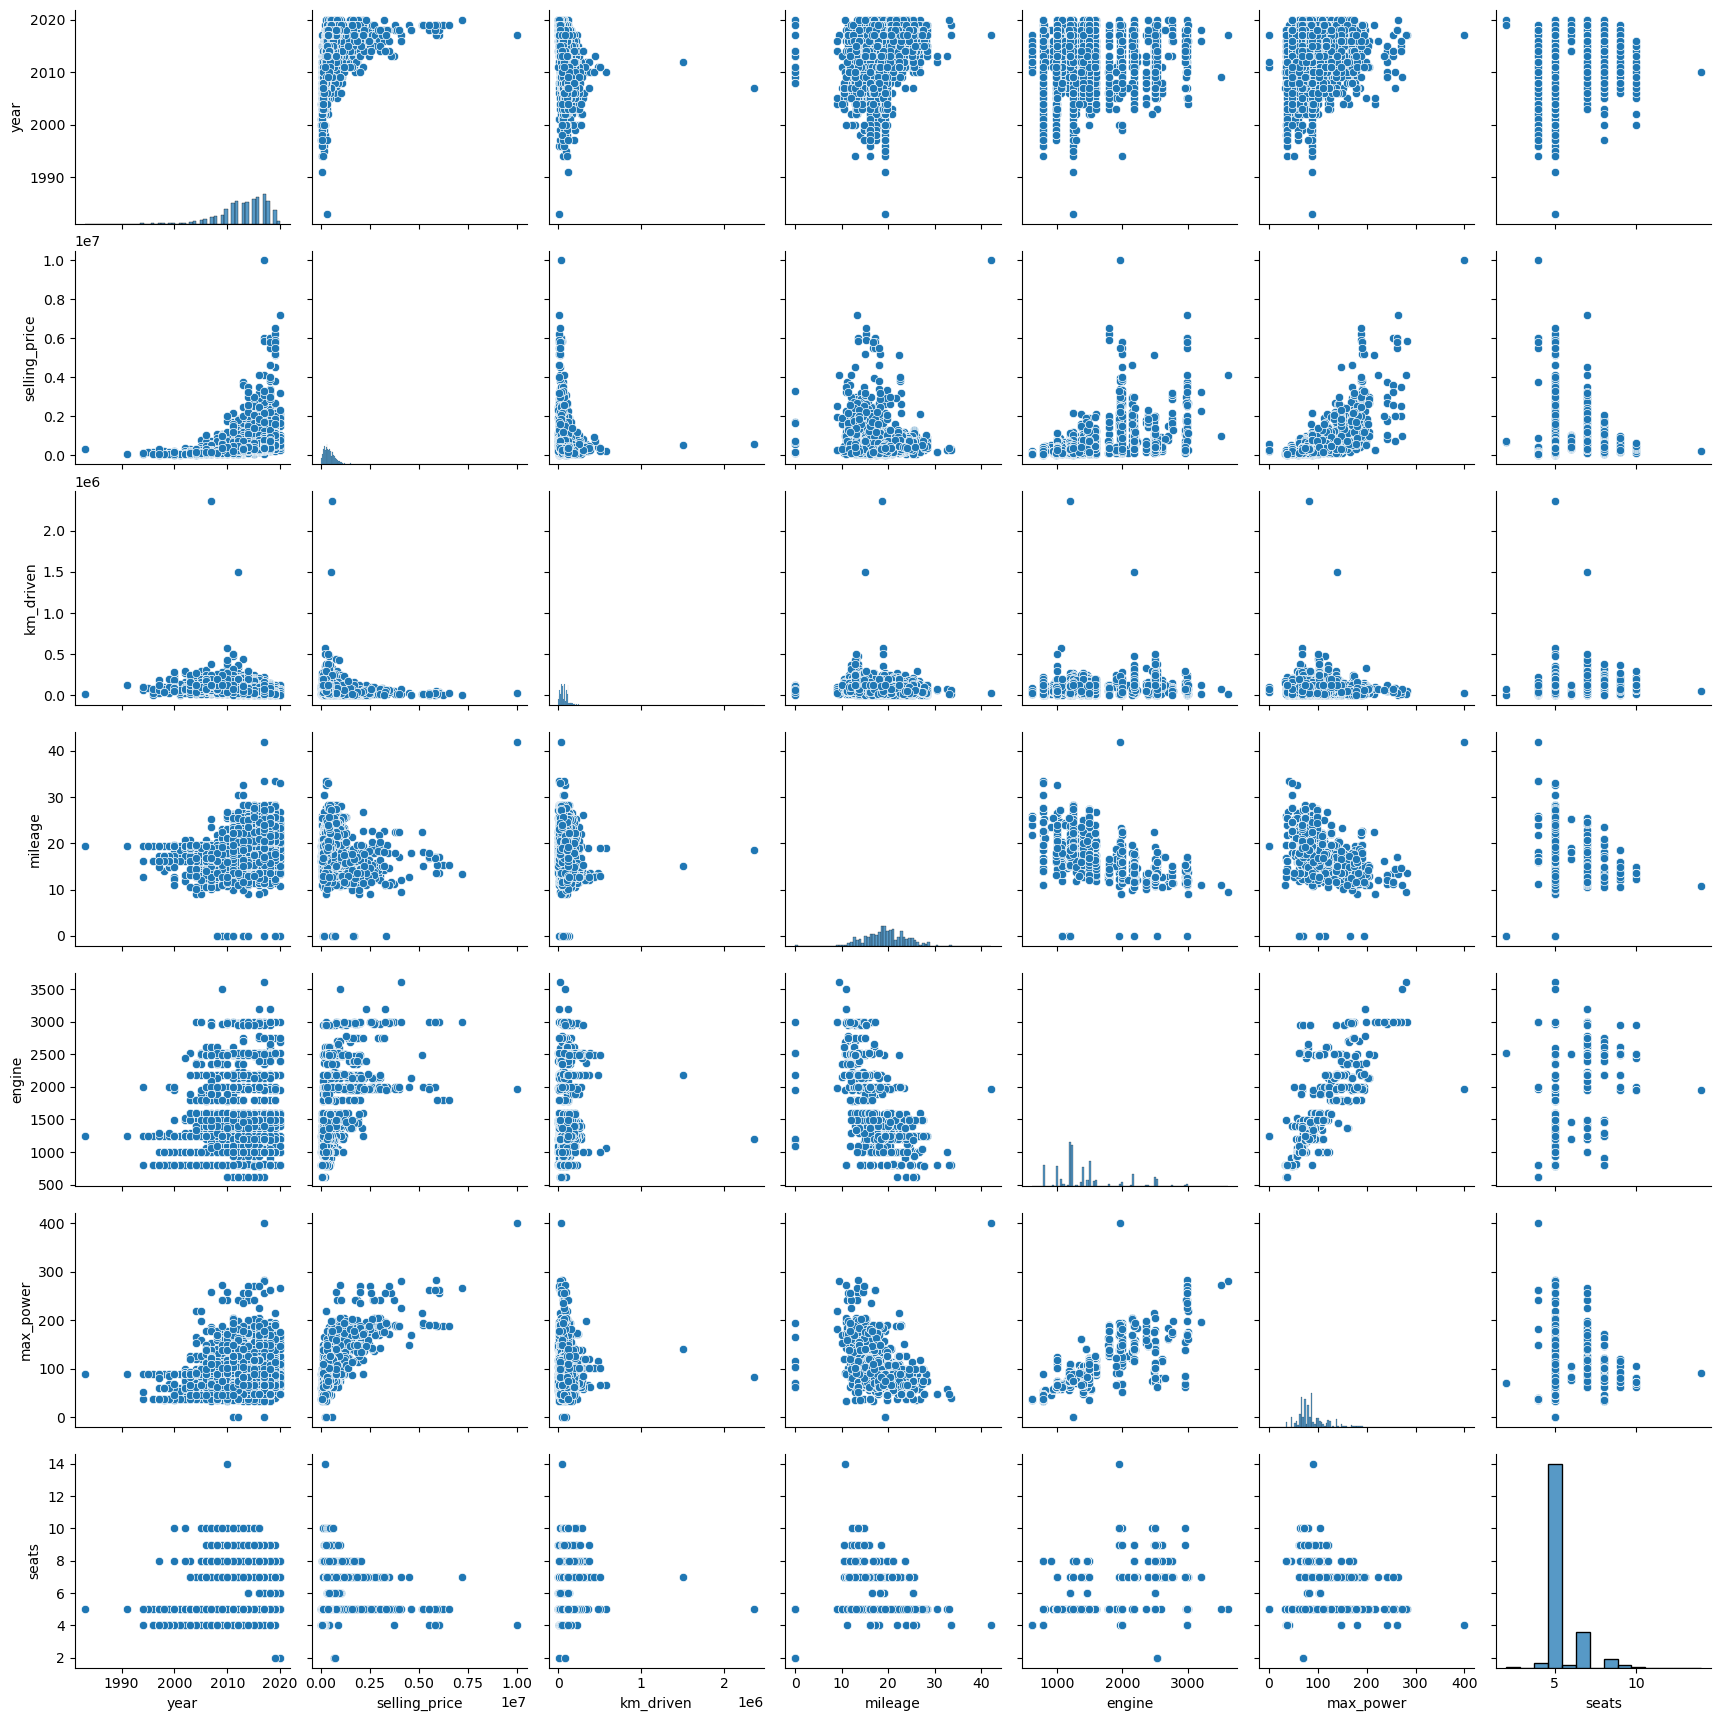

In [248]:
sns.pairplot(df_unique)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [249]:
print("сильнее всего на цену влияет год и количество пробега")
print("Очевидно, что объем двигателя влияет на можность машины ")

сильнее всего на цену влияет год и количество пробега
Очевидно, что объем двигателя влияет на можность машины 


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

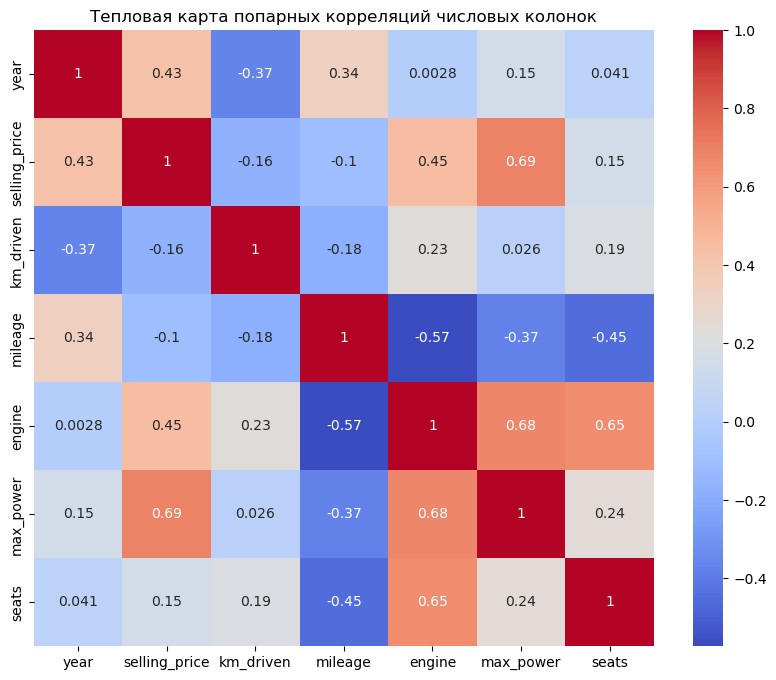

In [250]:
df_viz = df_train_unique
df_viz.drop('name', axis=1, inplace=True)
df_viz.drop('seller_type', axis=1, inplace=True)
df_viz.drop('fuel', axis=1, inplace=True)
df_viz.drop('transmission', axis=1, inplace=True)
df_viz.drop('owner', axis=1, inplace=True)
df_viz.drop('torque', axis=1, inplace=True)

correlation_matrix = df_viz.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Тепловая карта попарных корреляций числовых колонок")
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Наименее скоррелированы между собой признаки mileage и seats
Сильная линейная зависимость наблюдается между selling_price и max_power
Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Нет неправильно, потому что корреляция между этими призанками низкая


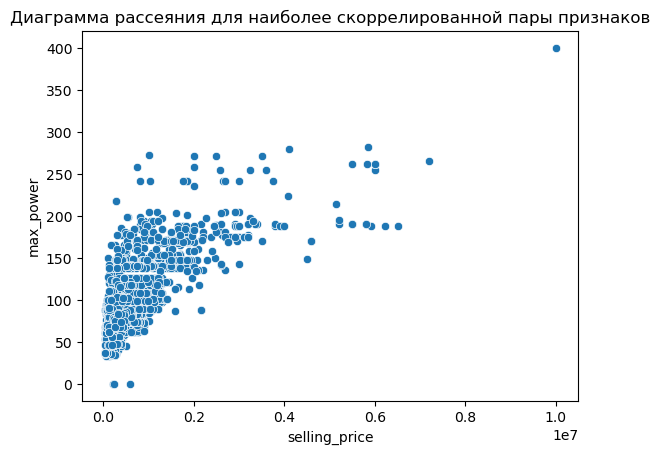

In [251]:
print('Наименее скоррелированы между собой признаки mileage и seats')
print('Сильная линейная зависимость наблюдается между selling_price и max_power')
print('Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи. Нет неправильно, потому что корреляция между этими призанками низкая')
# Отображение диаграммы рассеяния для наиболее скоррелированной пары признаков
sns.scatterplot(x='selling_price', y='max_power', data=df_viz)
plt.title("Диаграмма рассеяния для наиболее скоррелированной пары признаков")
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [252]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [253]:
print(df_train_unique)
print(df_test_unique)
df_train_real = df_train_unique
df_test_real = df_test

y_train = df_train_real['selling_price']

df_train_real.drop('selling_price', axis=1, inplace=True)

X_train = df_train_real

      year  selling_price  km_driven  mileage  engine  max_power  seats
0     2014         450000     145500    23.40    1248      74.00      5
1     2014         370000     120000    21.14    1498     103.52      5
2     2010         225000     127000    23.00    1396      90.00      5
3     2007         130000     120000    16.10    1298      88.20      5
4     2017         440000      45000    20.14    1197      81.86      5
...    ...            ...        ...      ...     ...        ...    ...
5835  2008         120000     191000    17.92    1086      62.10      5
5836  2013         260000      50000    18.90     998      67.10      5
5837  2013         320000     110000    18.50    1197      82.85      5
5838  2007         135000     119000    16.80    1493     110.00      5
5839  2009         382000     120000    19.30    1248      73.90      5

[5840 rows x 7 columns]
                                       name  year  selling_price  km_driven  \
0                    Mahindra Xy

In [254]:
assert X_train.shape == (5840, 6)

In [255]:
y_test =  df_test_real['selling_price']

df_test_real.drop('name', axis=1, inplace=True)
df_test_real.drop('fuel', axis=1, inplace=True)
df_test_real.drop('seller_type', axis=1, inplace=True)
df_test_real.drop('transmission', axis=1, inplace=True)
df_test_real.drop('owner', axis=1, inplace=True)
df_test_real.drop('torque', axis=1, inplace=True)
df_test_real.drop('selling_price', axis=1, inplace=True)
print(df_test_real)
X_test = df_test_real

     year  km_driven     mileage   engine  max_power  seats
0    2010     168000   14.0 kmpl  2498 CC    112 bhp    7.0
1    2017      25000   21.5 kmpl  1497 CC  108.5 bhp    5.0
2    2007     218463   12.9 kmpl  1799 CC    130 bhp    5.0
3    2015     173000   25.1 kmpl  1498 CC   98.6 bhp    5.0
4    2011      70000   16.5 kmpl  1172 CC     65 bhp    5.0
..    ...        ...         ...      ...        ...    ...
995  2008     100000  19.81 kmpl  1086 CC  68.05 bhp    5.0
996  2017      50000   18.6 kmpl  1197 CC  81.83 bhp    5.0
997  2009      40000   23.0 kmpl  1396 CC     90 bhp    5.0
998  2012      25000  20.36 kmpl  1197 CC   78.9 bhp    5.0
999  2016     110000   26.0 kmpl  1498 CC   98.6 bhp    5.0

[1000 rows x 6 columns]


In [256]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

X_test['mileage'] =X_test['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

X_test['engine']=X_test['engine'].astype(str).str.replace(' CC','').astype(float)

X_test['max_power']=X_test['max_power'] = pd.to_numeric(X_test['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')

X_test['mileage'] = X_test['mileage'].fillna(mileage_median)
X_test['engine'] = X_test['engine'].fillna(engine_median)
X_test['max_power'] = X_test['max_power'].fillna(max_power_median)
X_test['seats'] = X_test['seats'].fillna(seats_median)

print(X_test.isnull().sum())

print(X_test)
# Предсказание значений для тренировочной и тестовой выборки
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Вычисление R^2 для тренировочной и тестовой выборки
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вычисление MSE для тренировочной и тестовой выборки
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Вывод результатов
print("R^2 для тренировочной выборки:", r2_train)
print("R^2 для тестовой выборки:", r2_test)
print("MSE для тренировочной выборки:", mse_train)
print("MSE для тестовой выборки:", mse_test)

year         0
km_driven    0
mileage      0
engine       0
max_power    0
seats        0
dtype: int64
     year  km_driven  mileage  engine  max_power  seats
0    2010     168000    14.00  2498.0     112.00    7.0
1    2017      25000    21.50  1497.0     108.50    5.0
2    2007     218463    12.90  1799.0     130.00    5.0
3    2015     173000    25.10  1498.0      98.60    5.0
4    2011      70000    16.50  1172.0      65.00    5.0
..    ...        ...      ...     ...        ...    ...
995  2008     100000    19.81  1086.0      68.05    5.0
996  2017      50000    18.60  1197.0      81.83    5.0
997  2009      40000    23.00  1396.0      90.00    5.0
998  2012      25000    20.36  1197.0      78.90    5.0
999  2016     110000    26.00  1498.0      98.60    5.0

[1000 rows x 6 columns]
R^2 для тренировочной выборки: 0.5922151508368433
R^2 для тестовой выборки: 0.5939962535061445
MSE для тренировочной выборки: 116886771571.64865
MSE для тестовой выборки: 233382547180.86008


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [258]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(X_train)
scaled_features_test = scaler.fit_transform(X_test)

y_train= pd.DataFrame(y_train)
y_scaled_train = scaler.fit_transform(y_train)

y_test= pd.DataFrame(y_test)
y_scaled_test = scaler.fit_transform(y_test)



df_x_scaled_train = pd.DataFrame(scaled_features_train, columns=X_train.columns)
df_x_scaled_test = pd.DataFrame(scaled_features_test, columns=X_test.columns)

df_y_scaled_train = pd.DataFrame(y_scaled_train, columns=y_train.columns)
df_y_scaled_test =  pd.DataFrame(y_scaled_test, columns=y_test.columns)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [209]:
correlation_matrix = df_scaled_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Тепловая карта попарных корреляций числовых колонок")
plt.show()
print("Наиболее информативен в предсказании цены оказались параметры mileage и year")

NameError: name 'df_scaled_train' is not defined

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(df_x_scaled_train, y_train)

coefficients = lasso.coef_

feature_importance = pd.Series(coefficients, index=df_x_scaled_train.columns)

print(coefficients)

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
print("Нет не занулены, потому что каждый из параметров имеет влияние на цену")

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold

lasso = Lasso()
param_grid = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(lasso, param_grid, cv=10)
grid_search.fit(df_x_scaled_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
# Вывод оптимальных параметров и значения метрики качества
print("Оптимальные параметры:", best_params)
print("Значение метрики качества:", best_score)
best_alpha = grid_search.best_params_['alpha']
print("Значение коэффициента регуляризации:", best_alpha)
# Получение лучшей модели с оптимальными параметрами
best_model = grid_search.best_estimator_

# Получение коэффициентов регрессии
coefficients = best_model.coef_

# Проверка, занулились ли какие-нибудь веса
zero_weights = coefficients == 0

# Вывод результатов
print("Коэффициенты регрессии:", coefficients)
print("Зануленные веса:", zero_weights)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
print("Сколько грид-сёрчу пришлось обучать моделей?")
print("3 параметра на 10 фолдах каждая итого 30")
print("Ничего не было занулено")

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [216]:
from sklearn.linear_model import ElasticNet

# Создание экземпляра класса ElasticNet
elastic_net = ElasticNet()

# Определение сетки параметров
param_grid = {'alpha': [0.1, 1, 10]}

# Создание экземпляра класса GridSearchCV
grid_search_elastic = GridSearchCV(elastic_net, param_grid, cv=10)

# Обучение модели на данных с использованием перебора по сетке
grid_search_elastic.fit(df_x_scaled_train, y_train)

# Получение оптимальных параметров и значения метрики качества
best_params = grid_search_elastic.best_params_
best_score = grid_search_elastic.best_score_

# Вывод оптимальных параметров и значения метрики качества
print("Оптимальные параметры:", best_params)
print("Значение метрики качества:", best_score)

# Получение лучшей модели с оптимальными параметрами
best_model = grid_search_elastic.best_estimator_

# Получение коэффициентов регрессии
coefficients = best_model.coef_

# Проверка, занулились ли какие-нибудь веса
zero_weights = coefficients == 0

# Вывод результатов
print("Коэффициенты регрессии:", coefficients)
print("Зануленные веса:", zero_weights)

Оптимальные параметры: {'alpha': 0.1}
Значение метрики качества: 0.5736785471333882
Коэффициенты регрессии: [152945.55454372 -45113.31253162  24717.81759644  74172.77312115
 298012.62612999 -25314.01534257]
Зануленные веса: [False False False False False False]


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
print("Какие гиперпараметры соответствуют лучшей из перебранных моделей? ", best_params)

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
X_train_cat = df_train.drop_duplicates(subset=df_train.columns.drop('selling_price'))
X_train_cat.drop('name', axis=1, inplace=True)
X_train_cat.drop('seller_type', axis=1, inplace=True)
X_train_cat.drop('torque', axis=1, inplace=True)
print(X_train_cat)
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')
X_test_cat = df_test.drop_duplicates(subset=df_test.columns.drop('selling_price'))
X_test_cat.drop('name', axis=1, inplace=True)
X_test_cat.drop('seller_type', axis=1, inplace=True)
X_test_cat.drop('torque', axis=1, inplace=True)
print(X_test_cat)


In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [214]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# Создание экземпляра класса OneHotEncoder
encoder_train = OneHotEncoder()
encoder_test = OneHotEncoder()

# Закодирование категориальных фичей
categorical_features = ['fuel', 'transmission', 'owner','seats']
encoded_features = encoder_train.fit_transform(X_train_cat[categorical_features]).toarray()
encoded_features_test = encoder_test.fit_transform(X_test_cat[categorical_features]).toarray()
# Создание датафрейма с закодированными фичами
encoded_data = pd.DataFrame(encoded_features, columns=encoder_train.get_feature_names_out(categorical_features))
encoded_data_test = pd.DataFrame(encoded_features_test, columns=encoder_test.get_feature_names_out(categorical_features))
# Удаление одного из столбцов для избежания мультиколлинеарности
encoded_data = encoded_data.drop(columns=['fuel_Petrol', 'transmission_Manual', 'owner_First Owner','seats_nan'])
encoded_data_test = encoded_data_test.drop(columns=['fuel_Petrol', 'transmission_Manual', 'owner_First Owner','seats_nan'])

data_encoded = pd.concat([X_train_cat.drop(categorical_features, axis=1), encoded_data], axis=1)
data_encoded_test = pd.concat([X_test_cat.drop(categorical_features, axis=1), encoded_data_test], axis=1)
# Вывод закодированных данных
print(data_encoded)

data_encoded_test = data_encoded_test.dropna()

data_encoded_test = data_encoded_test.assign(seats_10_0=0)
data_encoded_test = data_encoded_test.assign(seats_14_0=0)
data_encoded_test = data_encoded_test.assign(seats_2_0=0)

data_encoded = data_encoded.rename(columns={'seats_10.0': 'seats_10_0'})
data_encoded = data_encoded.rename(columns={'seats_14.0': 'seats_14_0'})
data_encoded = data_encoded.rename(columns={'seats_2.0': 'seats_2_0'})

columns = list(set(data_encoded.columns) | set(data_encoded_test.columns))

data_encoded = data_encoded.reindex(columns=columns)
data_encoded_test = data_encoded_test.reindex(columns=columns)


data_encoded_test['mileage'] =data_encoded_test['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

data_encoded_test['engine']=data_encoded_test['engine'].astype(str).str.replace(' CC','').astype(float)

data_encoded_test['max_power']=data_encoded_test['max_power'] = pd.to_numeric(data_encoded_test['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')

print(data_encoded_test)

        year  selling_price  km_driven     mileage   engine   max_power  \
0     2014.0       450000.0   145500.0   23.4 kmpl  1248 CC      74 bhp   
1     2014.0       370000.0   120000.0  21.14 kmpl  1498 CC  103.52 bhp   
2     2010.0       225000.0   127000.0   23.0 kmpl  1396 CC      90 bhp   
3     2007.0       130000.0   120000.0   16.1 kmpl  1298 CC    88.2 bhp   
4     2017.0       440000.0    45000.0  20.14 kmpl  1197 CC   81.86 bhp   
...      ...            ...        ...         ...      ...         ...   
5806     NaN            NaN        NaN         NaN      NaN         NaN   
5814     NaN            NaN        NaN         NaN      NaN         NaN   
5833     NaN            NaN        NaN         NaN      NaN         NaN   
5836     NaN            NaN        NaN         NaN      NaN         NaN   
5837     NaN            NaN        NaN         NaN      NaN         NaN   

      fuel_CNG  fuel_Diesel  fuel_LPG  transmission_Automatic  ...  \
0          0.0          1.0  

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [215]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Создание экземпляра класса Ridge
ridge = Ridge()

# Определение сетки параметров
param_grid = {'alpha': [0.1, 1, 10]}

# Создание экземпляра класса GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, scoring='r2', cv=10)

selling_price_median = data_encoded['selling_price'].median() 
data_encoded['selling_price'] = data_encoded['selling_price'].fillna(selling_price_median)

y_data_encoded = data_encoded['selling_price']
data_encoded.drop('selling_price', axis=1, inplace=True)

data_encoded['mileage'] =data_encoded['mileage'].astype(str).str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

data_encoded['engine']=data_encoded['engine'].astype(str).str.replace(' CC','').astype(float)

data_encoded['max_power']=data_encoded['max_power'] = pd.to_numeric(df_train_unique['max_power'].astype(str).str.replace(' bhp', ''), errors='coerce')

mean_max_power = data_encoded['max_power'].mean()

data_encoded['max_power'] = data_encoded['max_power'].fillna(mean_max_power)

mileage_median = data_encoded['mileage'].median()
engine_median = data_encoded['engine'].median()
max_power_median = data_encoded['max_power'].median()
km_driven_median = data_encoded['km_driven'].median()
year_median = data_encoded['year'].median()

fuel_CNG_median = data_encoded['fuel_CNG'].median()                      
fuel_Diesel_median = data_encoded['fuel_Diesel'].median()                  
fuel_LPG_median =  data_encoded['fuel_LPG'].median() 

data_encoded['fuel_CNG'] = data_encoded['fuel_CNG'].fillna(fuel_CNG_median)
data_encoded['fuel_Diesel'] = data_encoded['fuel_Diesel'].fillna(fuel_Diesel_median)
data_encoded['fuel_LPG'] = data_encoded['fuel_LPG'].fillna(fuel_LPG_median)



transmission_Automatic_median = data_encoded['transmission_Automatic'].median() 
owner_Fourth_median = data_encoded['owner_Fourth & Above Owner'].median() 
owner_Second_median = data_encoded['owner_Second Owner'].median()      
owner_Test_median = data_encoded['owner_Test Drive Car'].median()      
owner_Third_median = data_encoded['owner_Third Owner'].median()

data_encoded['transmission_Automatic'] = data_encoded['transmission_Automatic'].fillna(transmission_Automatic_median)

data_encoded['owner_Fourth & Above Owner'] = data_encoded['owner_Fourth & Above Owner'].fillna(owner_Fourth_median)
data_encoded['owner_Second Owner'] = data_encoded['owner_Second Owner'].fillna(owner_Second_median)
data_encoded['owner_Test Drive Car'] = data_encoded['owner_Test Drive Car'].fillna(owner_Test_median)
data_encoded['owner_Third Owner'] = data_encoded['owner_Third Owner'].fillna(owner_Third_median)


seats_2_median = data_encoded['seats_2_0'].median()             
seats_4_median  = data_encoded['seats_4.0'].median()                        
seats_5_median = data_encoded['seats_5.0'].median()                    
seats_6_median = data_encoded['seats_6.0'].median()                    
seats_7_median = data_encoded['seats_7.0'].median()                    
seats_8_median = data_encoded['seats_8.0'].median()       
seats_9_median = data_encoded['seats_9.0'].median()       
seats_10_median = data_encoded['seats_10_0'].median()                    
seats_14_median = data_encoded['seats_14_0'].median()         

data_encoded['seats_2_0'] = data_encoded['seats_2_0'].fillna(seats_2_median)
data_encoded['seats_4.0'] = data_encoded['seats_4.0'].fillna(seats_4_median)
data_encoded['seats_5.0'] = data_encoded['seats_5.0'].fillna(seats_5_median)
data_encoded['seats_6.0'] = data_encoded['seats_6.0'].fillna(seats_6_median)
data_encoded['seats_7.0'] = data_encoded['seats_7.0'].fillna(seats_7_median)
data_encoded['seats_8.0'] = data_encoded['seats_8.0'].fillna(seats_8_median)
data_encoded['seats_9.0'] = data_encoded['seats_9.0'].fillna(seats_9_median)
data_encoded['seats_10_0'] = data_encoded['seats_10_0'].fillna(seats_10_median)
data_encoded['seats_14_0'] = data_encoded['seats_14_0'].fillna(seats_14_median)


data_encoded['year'] = data_encoded['year'].fillna(year_median)
data_encoded['km_driven'] = data_encoded['km_driven'].fillna(km_driven_median)
data_encoded['mileage'] = data_encoded['mileage'].fillna(mileage_median)
data_encoded['engine'] = data_encoded['engine'].fillna(engine_median)
data_encoded['max_power'] = data_encoded['max_power'].fillna(max_power_median)


missing_values_x = data_encoded.isnull().sum()

# Вывод результатов
print("Пропуски в датасете: X")
print(missing_values_x)


missing_values_y = y_data_encoded.isnull().sum()

print("Пропуски в датасете: Y")
print(missing_values_y)


x_data_encoded = data_encoded
y_data_encoded_test = data_encoded_test['selling_price']
data_encoded_test.drop('selling_price', axis=1, inplace=True)
x_data_encoded_test = data_encoded_test
# Обучение модели на данных с использованием перебора по сетке
grid_search.fit(x_data_encoded, y_data_encoded)
# Получение оптимальных параметров и значения метрики качества
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Вывод оптимальных параметров и значения метрики качества
print("Оптимальные параметры:", best_params)
print("Значение метрики качества:", best_score)

# Проверка, удалось ли улучшить качество предсказаний
if best_score > r2_score(y_data_encoded_test, ridge.fit(x_data_encoded, y_data_encoded).predict(x_data_encoded_test)):
    print("Удалось улучшить качество предсказаний")
else:
    print("Не удалось улучшить качество предсказаний")

Пропуски в датасете: X
seats_2_0                     0
seats_5.0                     0
seats_9.0                     0
transmission_Automatic        0
year                          0
engine                        0
seats_6.0                     0
owner_Test Drive Car          0
owner_Third Owner             0
owner_Fourth & Above Owner    0
owner_Second Owner            0
seats_14_0                    0
seats_8.0                     0
max_power                     0
fuel_LPG                      0
seats_10_0                    0
seats_7.0                     0
seats_4.0                     0
fuel_Diesel                   0
fuel_CNG                      0
km_driven                     0
mileage                       0
dtype: int64
Пропуски в датасете: Y
0
Оптимальные параметры: {'alpha': 10}
Значение метрики качества: 0.3581920028631245
Не удалось улучшить качество предсказаний


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [217]:
def business_metrics(y_true, y_pred):
# Расчет разницы между предсказанными и реальными ценами в процентах
    price_diff_percent = [(predicted - actual) / actual * 100 for predicted, actual in zip(y_pred, y_true)]

# Подсчет доли предсказаний, где разница не превышает 10%
    within_10_percent = len([diff for diff in price_diff_percent if abs(diff) <= 10]) / len(price_diff_percent)
    print(within_10_percent)
business_metrics(y_train_pred,y_test_pred)

0.076


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link